In [2]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
linux_pro1 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/Linux_process_1.csv')
linux_pro2 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/Linux_process_2.csv')
linux_pro = pd.concat([linux_pro1, linux_pro2])

In [5]:
linux_pro.drop('ts', axis = 1, inplace=True)
linux_pro.drop('type', axis = 1, inplace= True)

linux_pro.head()

,PID,TRUN,TSLPI,TSLPU,POLI,NICE,PRI,RTPR,CPUNR,Status,EXC,State,CPU,CMD,label
0,3257,0,23,0,norm,0,120,0,2,N,0,S,0.13,Web-Content,0
1,1442,0,1,0,norm,0,120,0,0,N,0,S,0.09,Xorg,0
2,3197,0,63,0,norm,0,120,0,3,N,0,S,0.06,firefox,0
3,2774,0,8,0,norm,0,120,0,0,N,0,S,0.06,compiz,0
4,2797,0,5,0,norm,0,120,0,0,N,0,S,0.04,nautilus,0


In [6]:
linux_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927968 entries, 0 to 927967
Data columns (total 15 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PID     int64  
 1   TRUN    int64  
 2   TSLPI   int64  
 3   TSLPU   int64  
 4   POLI    object 
 5   NICE    int64  
 6   PRI     int64  
 7   RTPR    int64  
 8   CPUNR   int64  
 9   Status  object 
 10  EXC     int64  
 11  State   object 
 12  CPU     float64
 13  CMD     object 
 14  label   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 235.3+ MB


In [7]:
linux_pro['State'].replace('S',  '-2', inplace=True)
linux_pro['State'].replace('I',  '2', inplace=True)
linux_pro['State'].replace('R',  '1', inplace=True)
linux_pro['State'].replace('E',  '0', inplace=True)
linux_pro['State'].replace('Z',  '4', inplace=True)
linux_pro['State'].replace('D',  '-1', inplace=True)
linux_pro['State'].replace('T',  '3', inplace=True)
linux_pro['State']=linux_pro['State'].astype(int)

linux_pro['Status'].replace('-',  '-1', inplace=True)
linux_pro['Status'].replace('NE',  '1', inplace=True)
linux_pro['Status'].replace('N',  '2', inplace=True)
linux_pro['Status'].replace('NS',  '3', inplace=True)
linux_pro['Status'].replace('C',  '4', inplace=True)
linux_pro['Status'].replace('NC',  '5', inplace=True)
linux_pro['Status']=linux_pro['Status'].astype(int)

linux_pro['POLI'].replace('-',  '-1', inplace=True)
linux_pro['POLI'].replace('norm',  '1', inplace=True)
linux_pro['POLI']=linux_pro['POLI'].astype(int)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_pro['CMD'] = le.fit_transform(linux_pro['CMD'])

col:  PID


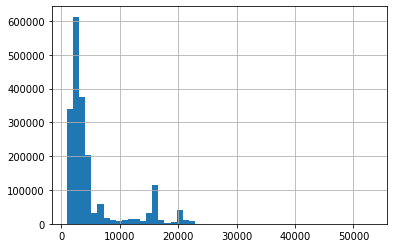

col:  TRUN


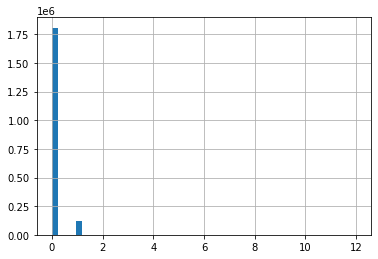

col:  TSLPI


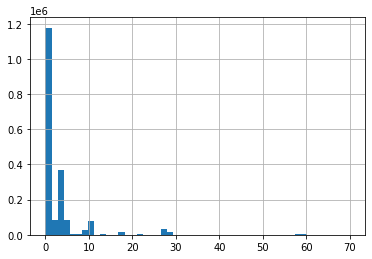

col:  TSLPU


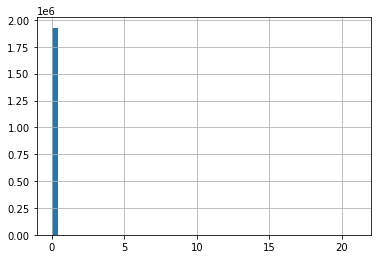

col:  POLI


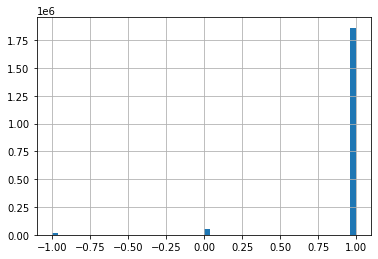

col:  NICE


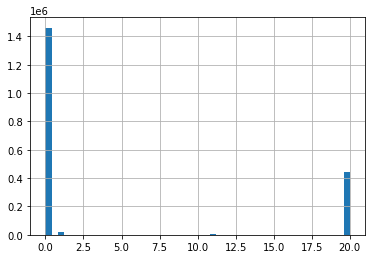

col:  PRI


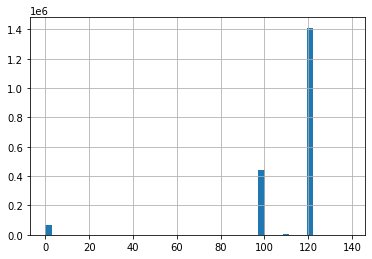

col:  RTPR


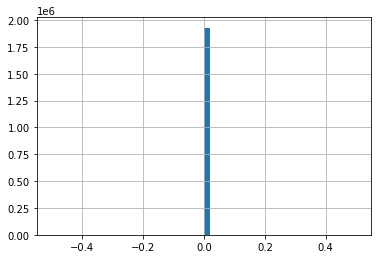

col:  CPUNR


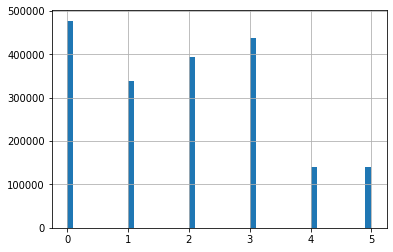

col:  Status


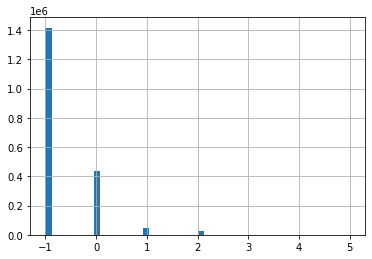

col:  EXC


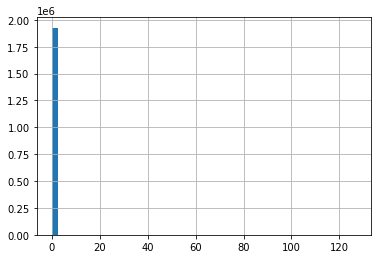

col:  State


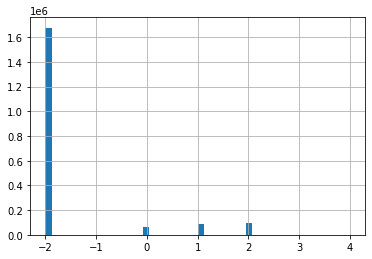

col:  CPU


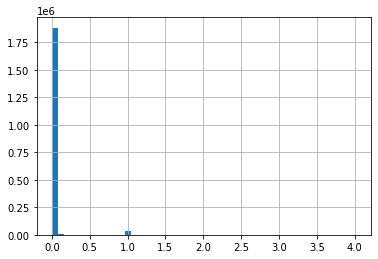

col:  CMD


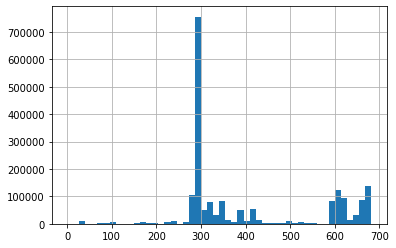

col:  label


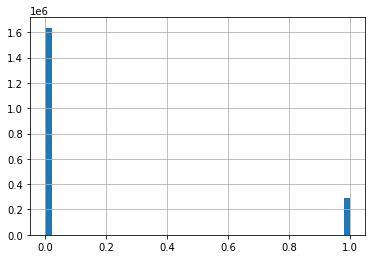

In [9]:
import matplotlib.pyplot as plt
columns = linux_pro.columns

for col in columns:
    print("col: ", col)
    linux_pro[col].hist(bins = 50)
    plt.show()

In [10]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

# Without Oversampling

In [11]:
x = linux_pro.drop('label', axis = 1)
y = linux_pro['label']

In [12]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [13]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_logistic = lr.predict(x_test)
print(y_pred_logistic)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
LogisticRegressionAccuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression : ",LogisticRegressionAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
LogisticRegressionf1_scr = f1_score(y_test, y_pred_logistic)
print("f1_score of Logistic Regression : ",LogisticRegressionf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_logistic)
print('AUC: %.2f' % auc)

[1 1 1 ... 0 0 0]
Accuracy of Logistic Regression :  74.2896147653903 %
f1_score of Logistic Regression :  38.83355215747441 %
AUC: 0.66


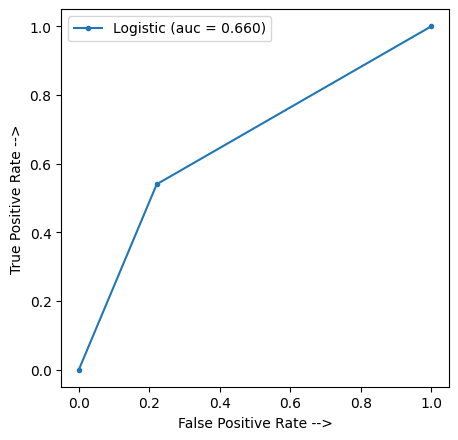

In [14]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [15]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred_logistic)

array([[159366,  45209],
       [ 16752,  19669]])

In [ ]:
# Import LR, DTC, EMB, RF, LIME, SHAP

!pip install interpret
from interpret.glassbox import (LogisticRegression, ClassificationTree, ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

In [17]:

#Interpretable =>
# %% logistic regression model
lr = LogisticRegression(random_state=2021, feature_names=x_train.columns, penalty='l1', solver='liblinear')
lr.fit(x_train, y_train)
print("Training finished.")
# %% Evaluate logistic regression model
y_pred = lr.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Explain local prediction
lr_local = lr.explain_local(x_test[:100], y_test[:100], name='Logistic Regression')
show(lr_local)
# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

Training finished.
F1 Score 0.49001970006581297
Accuracy 0.8461717206924596


In [18]:
# %% LR Lime
from interpret.blackbox import LimeTabular
from interpret import show

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(predict_fn=lr.predict_proba, 
                   data=x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')
show(lime_local)

F1 Score 0.4909688806981541
Accuracy 0.8442339291938455


In [ ]:
# %% LR shap
import shap

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Create SHAP explainer
explainer = shap.KernelExplainer(lr.predict_proba, x_train)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(x_test[start_index:end_index])
x_test[start_index:end_index]
# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = lr.predict(x_test[start_index:end_index])[0]
print(f"The LR predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                x_test[start_index:end_index]) # for values
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, x_test)


F1 Score 0.4909688806981541
Accuracy 0.8442339291938455


  0%|          | 0/1 [00:00<?, ?it/s]

# **Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1432029, 1: 254943}
After oversampling {0: 1432029, 1: 1432029}


In [ ]:
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_logistic = lr.predict(x_test)
print(y_pred_logistic)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
LogisticRegressionAccuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression : ",LogisticRegressionAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
LogisticRegressionf1_scr = f1_score(y_test, y_pred_logistic)
print("f1_score of Logistic Regression : ",LogisticRegressionf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_logistic)
print('AUC: %.2f' % auc)

[1 1 1 ... 1 1 1]
Accuracy of Logistic Regression :  65.03168932451041 %
f1_score of Logistic Regression :  60.37708378830895 %
AUC: 0.65


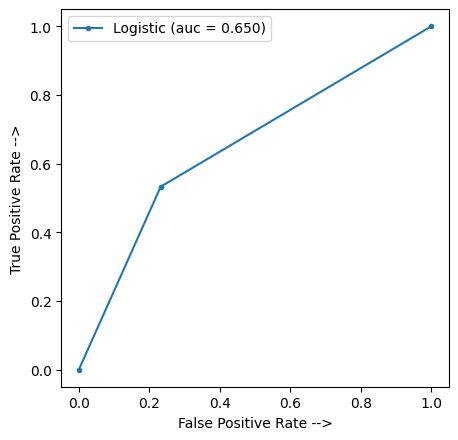

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

confusion_matrix(y_test,y_pred_logistic)

array([[137437,  41566],
       [ 83623,  95381]])

In [ ]:
f1_score(y_test,y_pred_logistic )

0.6037708378830895

# Result when we use undersampling on the data

In [ ]:
x = linux_pro.drop('label', axis = 1)
y = linux_pro['label']

In [ ]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_unsampled, y_unsampled = rus.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_unsampled))

Before undersampling Counter({0: 1432029, 1: 254943})
After undersampling Counter({0: 254943, 1: 254943})


In [ ]:
# --------------------------Logistic Reg -----------------------------------

for train_index, test_index in skf.split(x_unsampled, y_unsampled):
    x_train, x_test, y_train, y_test = x_unsampled.iloc[train_index], x_unsampled.iloc[test_index], y_unsampled.iloc[train_index], y_unsampled.iloc[test_index]

lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_logistic = lr.predict(x_test)
print(y_pred_logistic)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
LogisticRegressionuAccuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression : ",LogisticRegressionuAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
LogisticRegressionuf1_scr = f1_score(y_test, y_pred_logistic)
print("f1_score of Logistic Regression : ",LogisticRegressionuf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_logistic)
print('AUC: %.2f' % auc)

[1 1 1 ... 0 1 1]
Accuracy of Logistic Regression :  64.6505060014121 %
f1_score of Logistic Regression :  61.30727485058735 %
AUC: 0.65


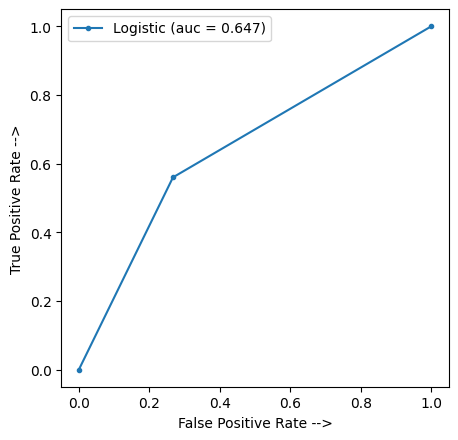

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

confusion_matrix(y_test,y_pred_logistic)

array([[23356,  8511],
       [14019, 17849]])

#**Better f1 score**

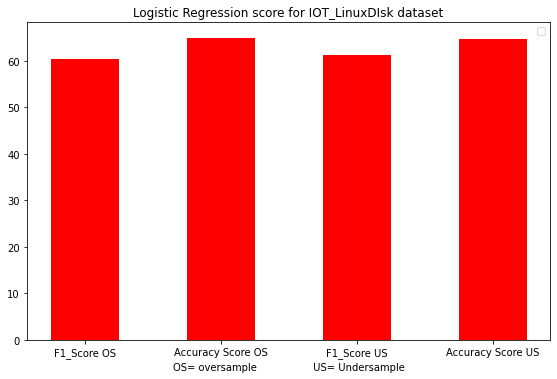

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax=plt.subplots( figsize= (8,5))
names = ['F1_Score OS', 'Accuracy Score OS','F1_Score US', 'Accuracy Score US' ]
plt.tight_layout()
plt.subplots_adjust(wspace = 1, hspace = 1)
acc= [LogisticRegressionf1_scr*100, LogisticRegressionAccuracy*100, LogisticRegressionuf1_scr*100, LogisticRegressionuAccuracy*100 ]
position = [1,2,3,4]
ax.bar(position,acc, width=0.5, color="red", bottom=None, align='center')
plt.xticks(position,names )
plt.subplots_adjust(wspace = 1, hspace = 1)
ax.set_title('Logistic Regression score for IOT_LinuxDIsk dataset')
ax.set_xlabel('OS= oversample                  US= Undersample')
plt.legend()